In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('./RTA Dataset.csv')


In [5]:
# View the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check column names
print(data.columns)

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
# Drop rows with missing values in relevant columns
data = data.dropna(subset=['Weather_conditions', 'Road_surface_conditions', 'Time'])

# Convert the 'Time' column to datetime if it's not already
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Drop rows where 'Time' couldn't be converted (NaT values)
data = data.dropna(subset=['Time'])

In [11]:
# Extract hour from 'Time' for time-based analysis
data['Hour'] = data['Time'].dt.hour

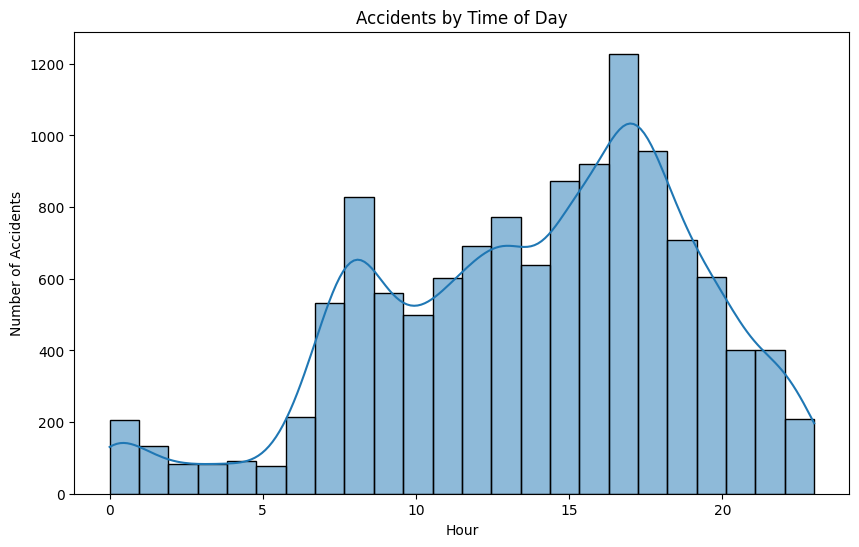

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Hour'], bins=24, kde=True)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

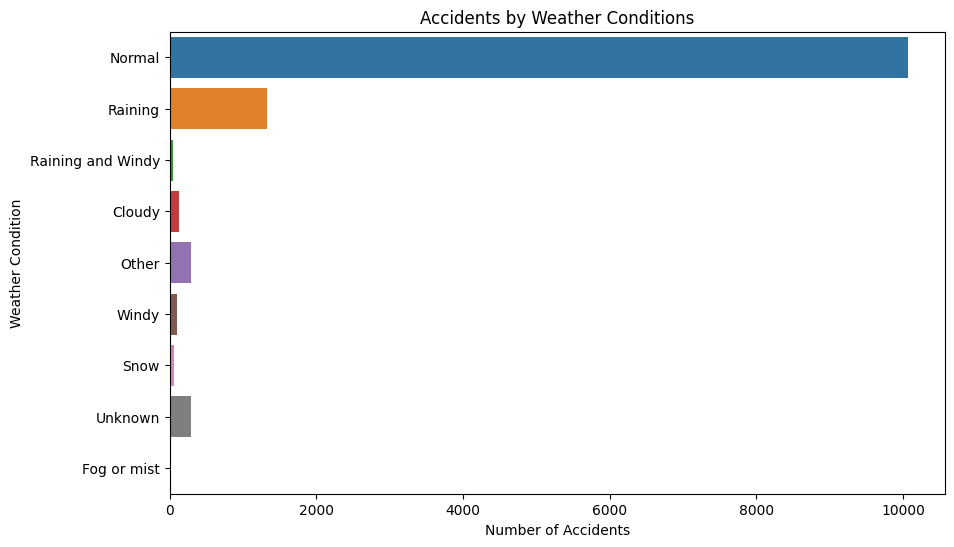

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_conditions', data=data)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

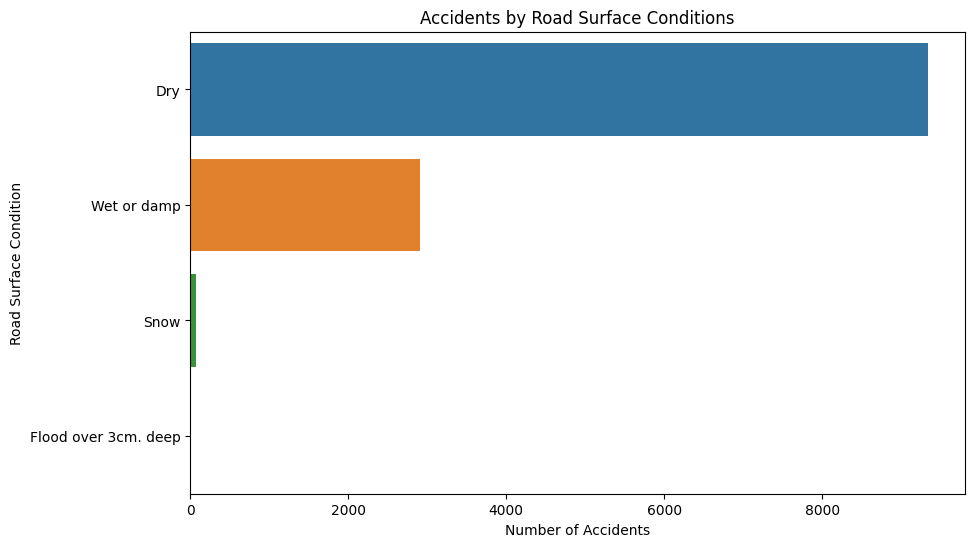

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Road_surface_conditions', data=data)
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Condition')
plt.show()

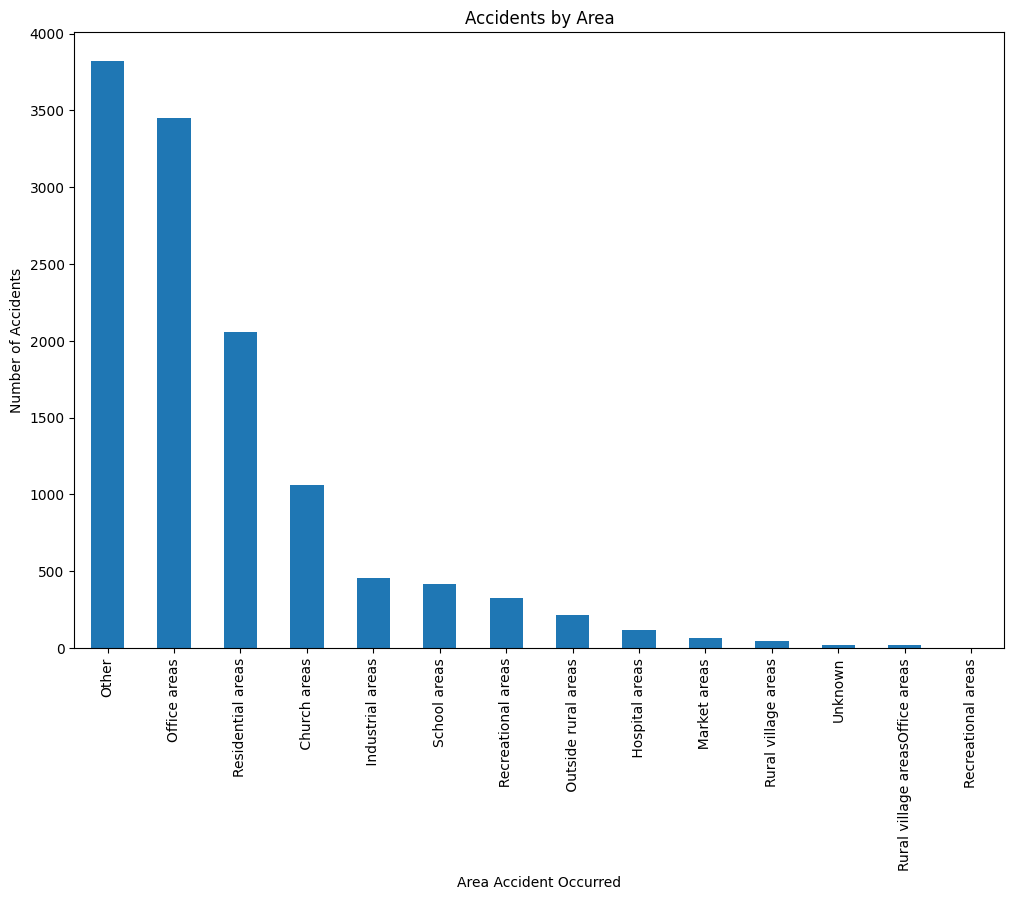

In [18]:
# Count accidents by area
area_accidents = data['Area_accident_occured'].value_counts()

# Plot accident frequency by area
plt.figure(figsize=(12, 8))
area_accidents.plot(kind='bar')
plt.title('Accidents by Area')
plt.xlabel('Area Accident Occurred')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()


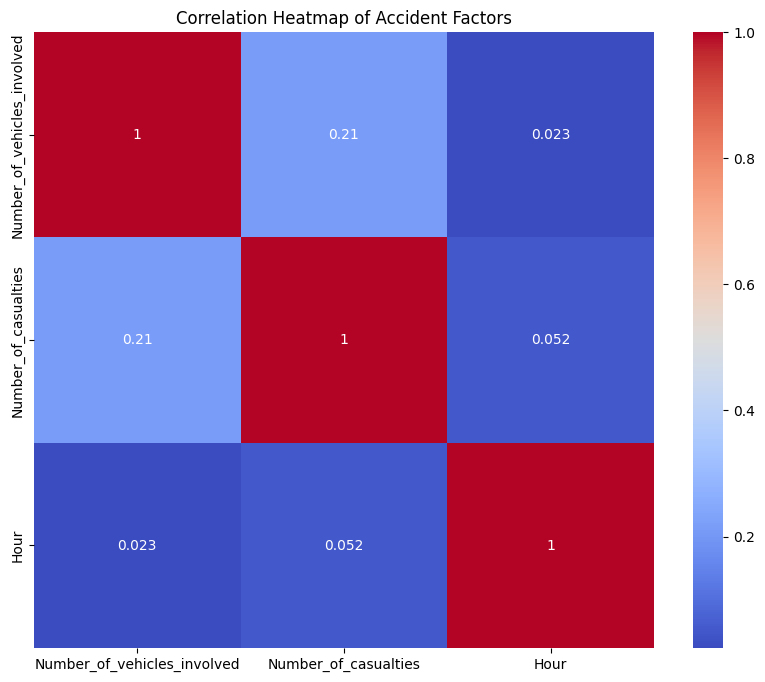

In [19]:
# Select relevant numeric columns for correlation analysis
correlation_data = data[['Number_of_vehicles_involved', 'Number_of_casualties', 'Hour']]

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Accident Factors')
plt.show()
